   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

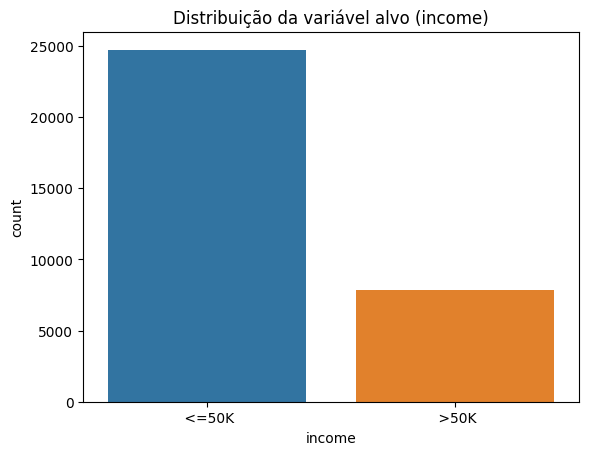

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo CSV
url = "https://raw.githubusercontent.com/labulatif/public/main/adultos.csv"
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame para entender a estrutura dos dados
print(df.head())

# Identificar o tipo de dados de cada coluna
data_types = df.dtypes
print("\nTipos de dados de cada coluna:\n", data_types)

# Resumo estatístico das variáveis numéricas
summary_stats = df.describe()
print("\nResumo estatístico das variáveis numéricas:\n", summary_stats)

# Visualizar a distribuição da variável alvo 'income'
sns.countplot(x='income', data=df)
plt.title('Distribuição da variável alvo (income)')
plt.show()



Tipos de dados de cada coluna:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


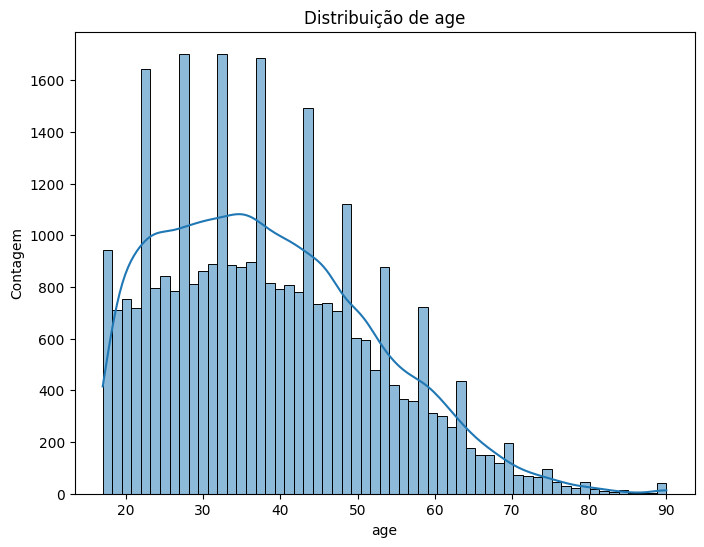

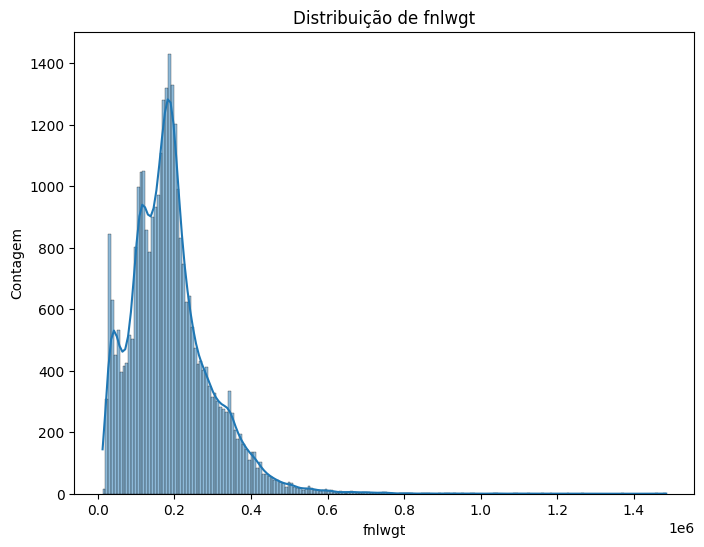

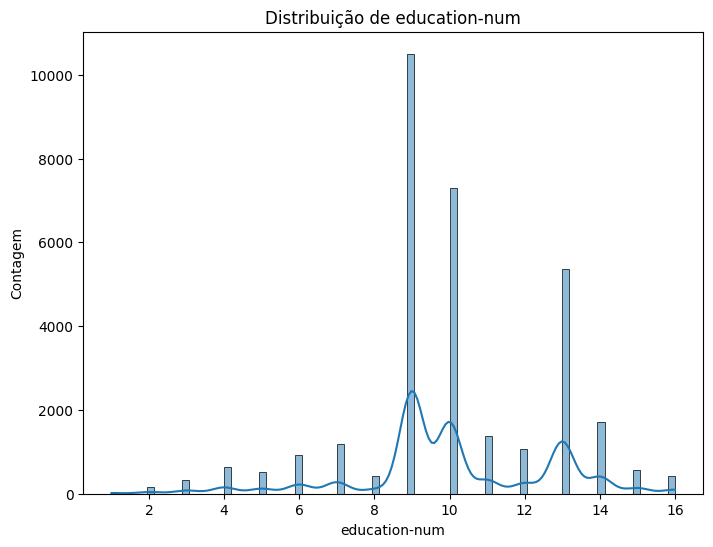

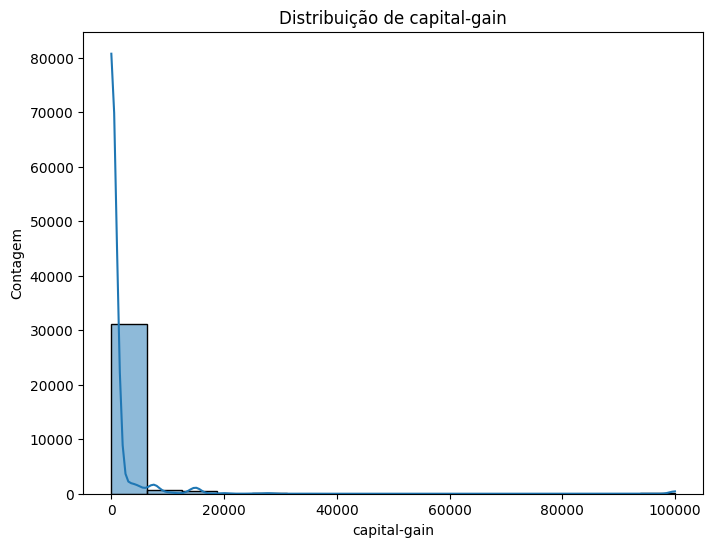

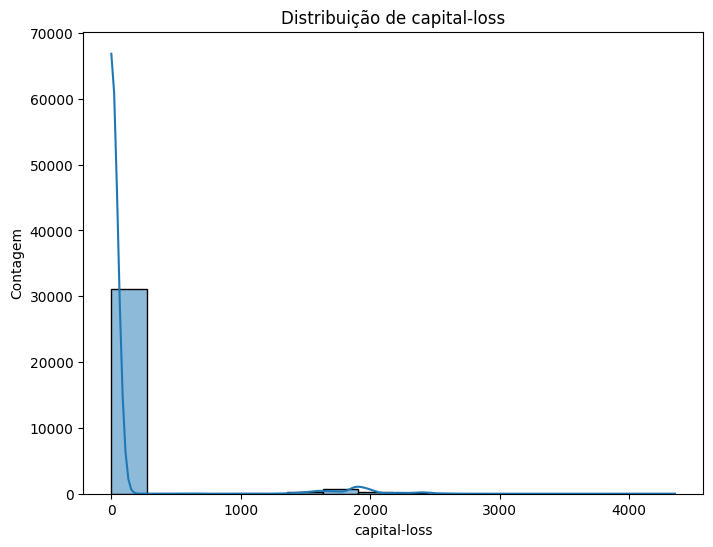

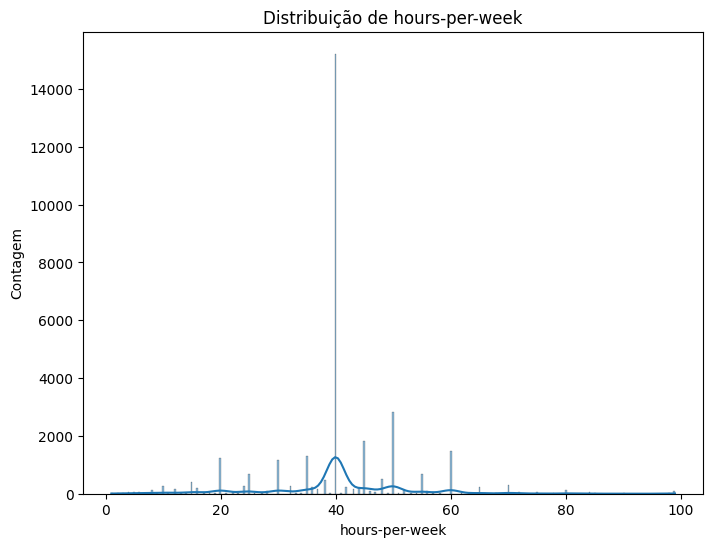

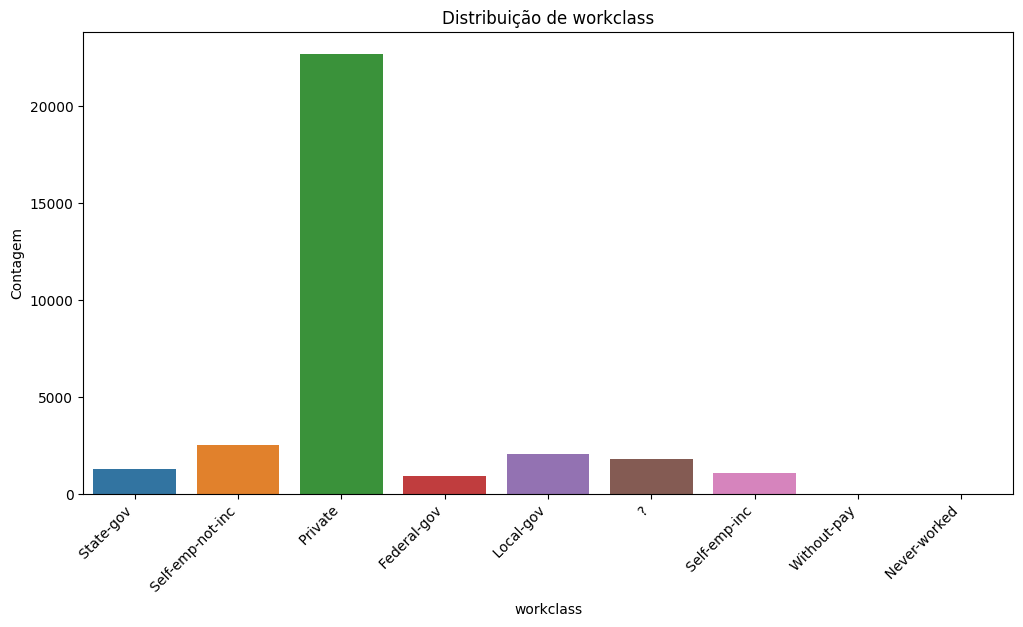

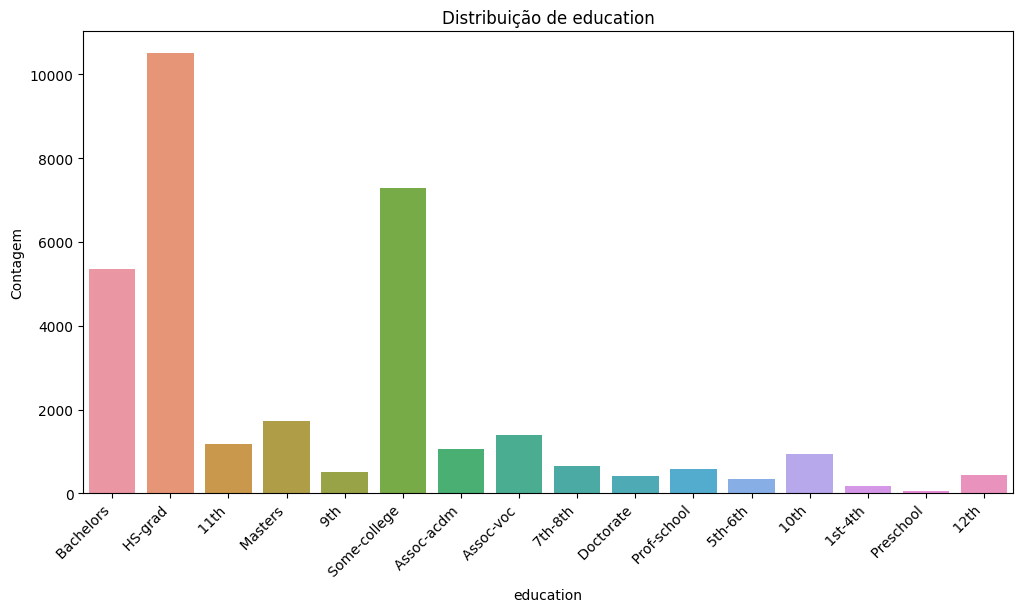

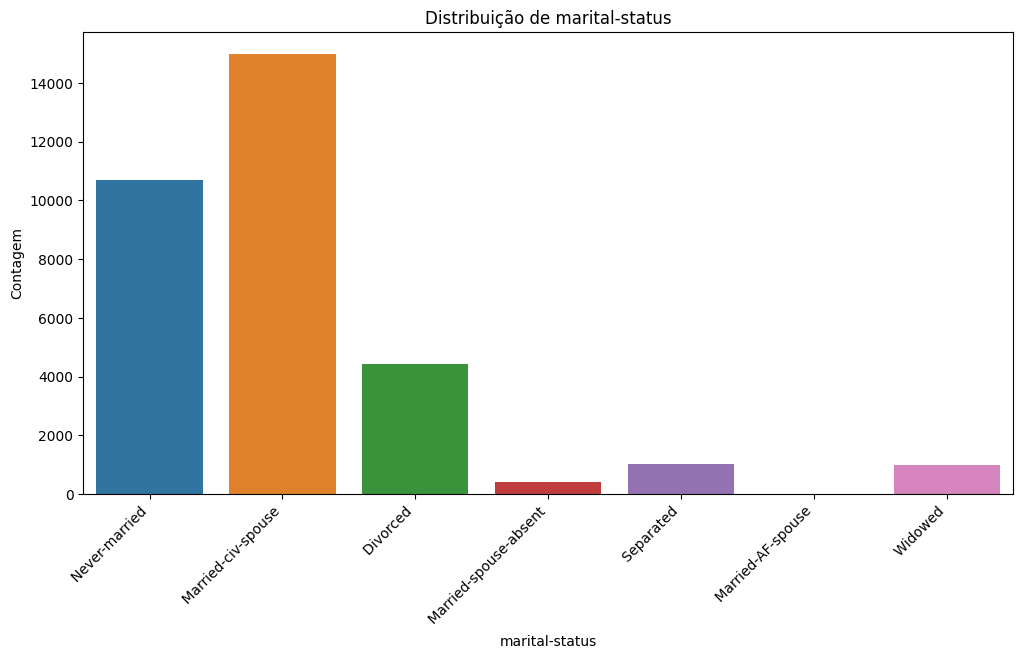

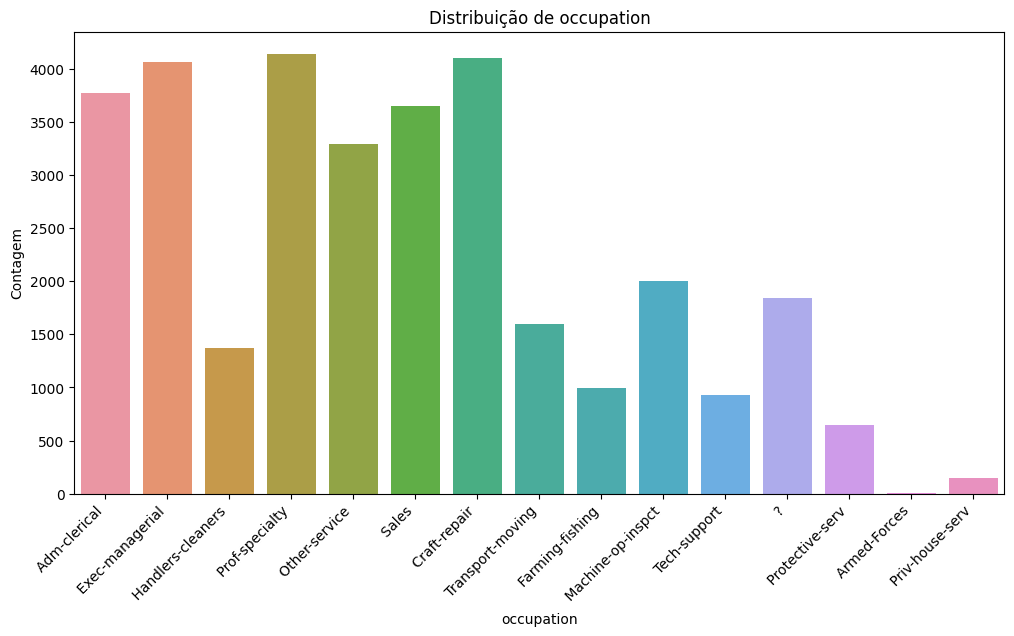

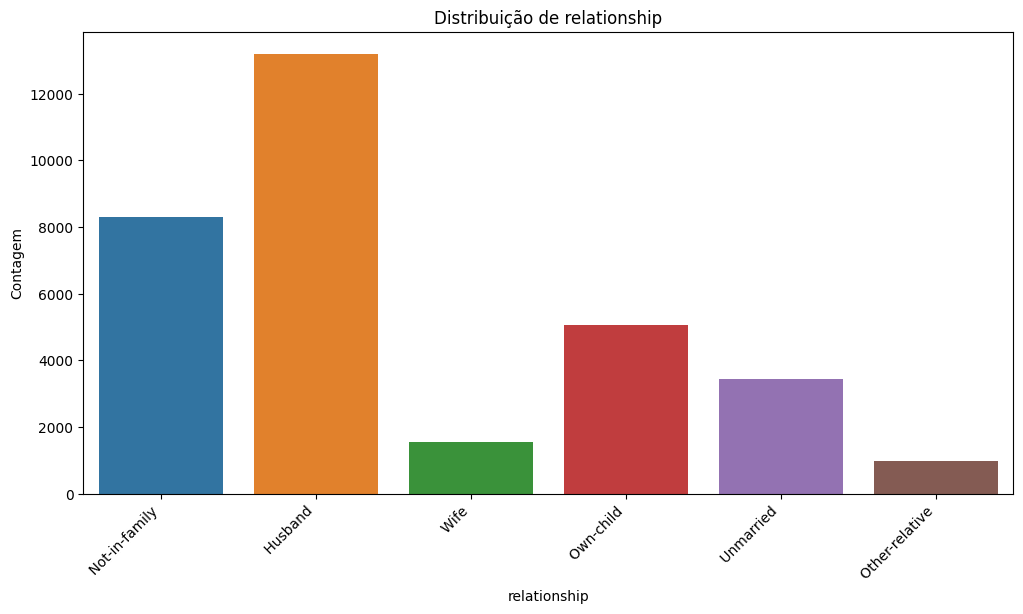

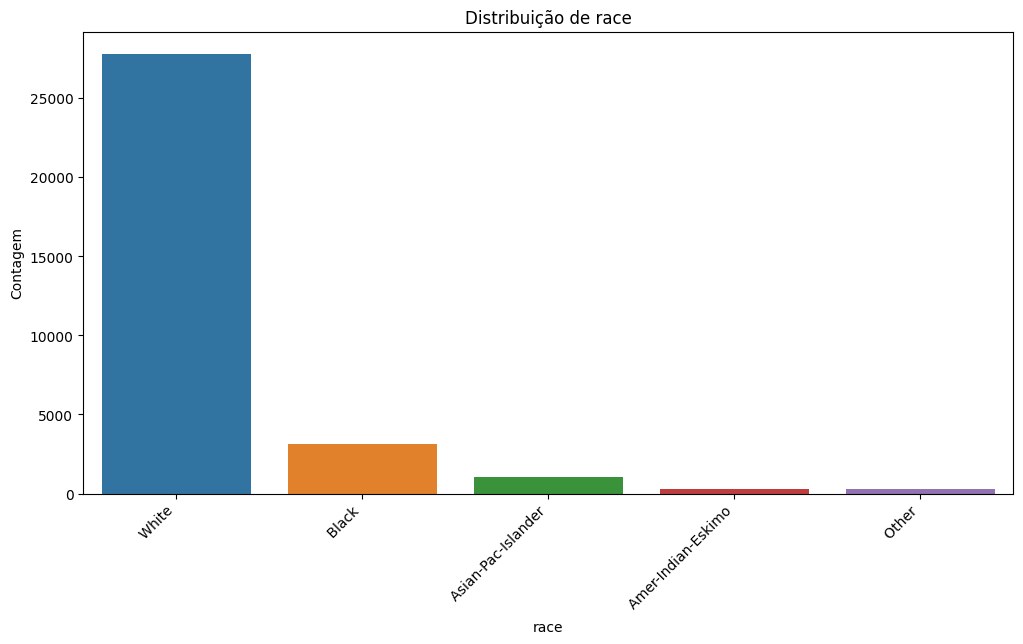

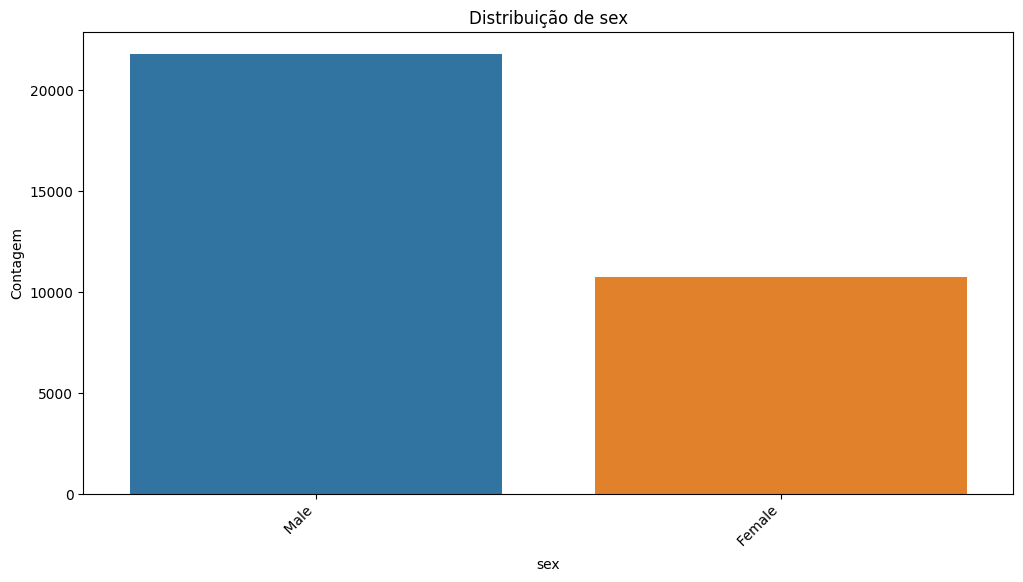

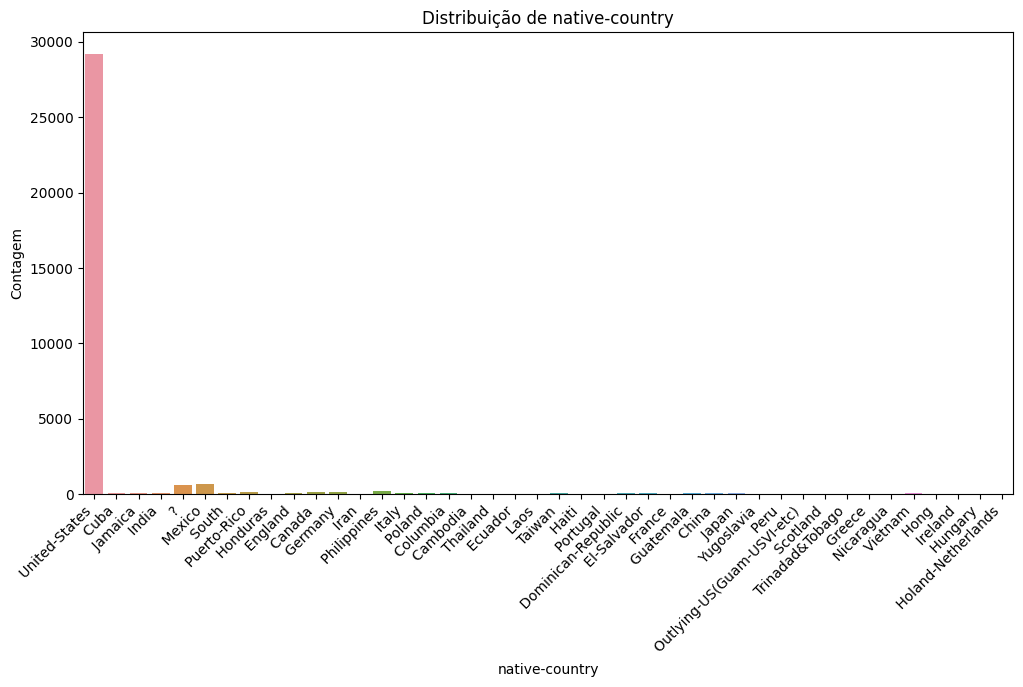

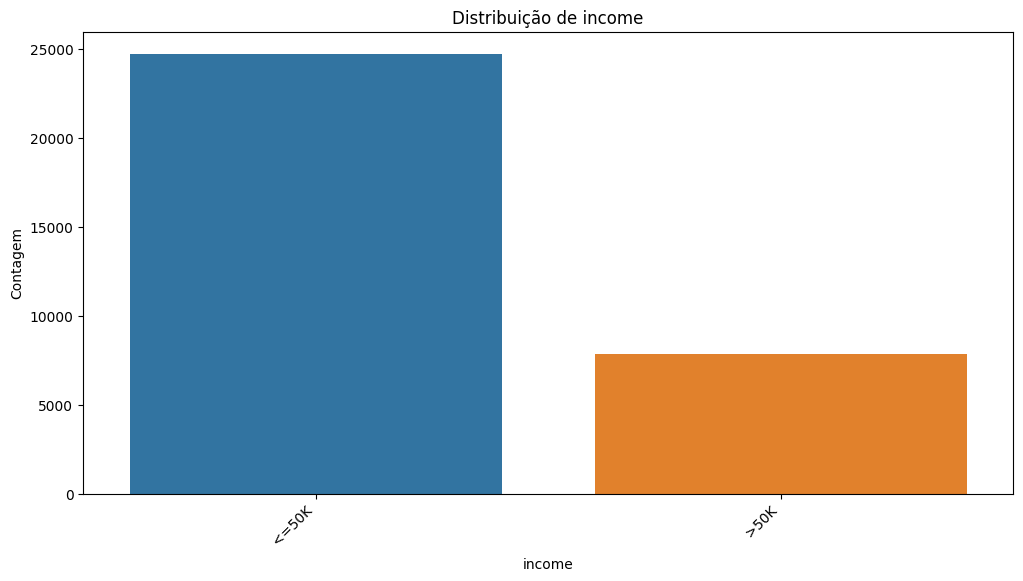

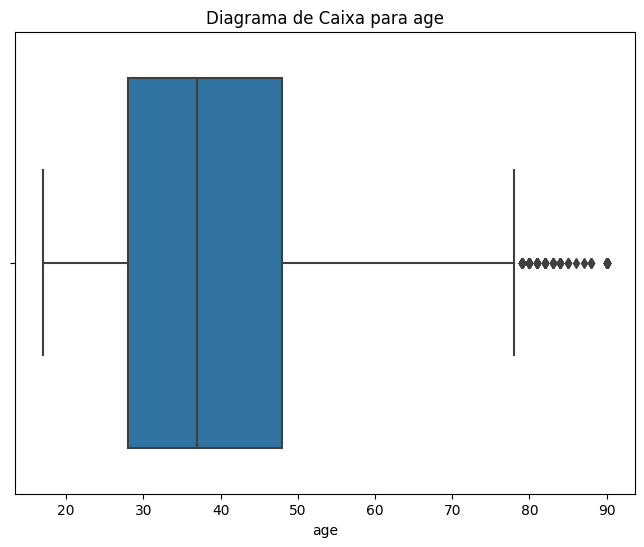

In [2]:
# Identificar o tipo de dados de cada coluna
data_types = df.dtypes
print("\nTipos de dados de cada coluna:\n", data_types)

# Gráficos descritivos para variáveis numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()

# Gráficos de contagem para variáveis categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Gráfico de caixa para a variável 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Diagrama de Caixa para age')
plt.xlabel('age')
plt.show()



Tipos de dados de cada coluna:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


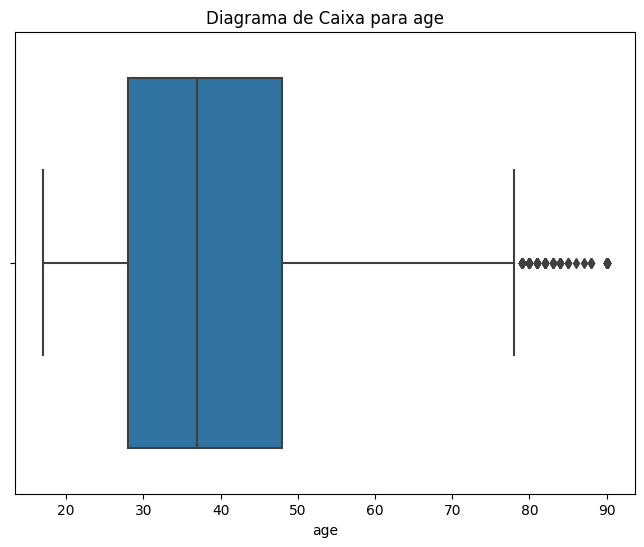

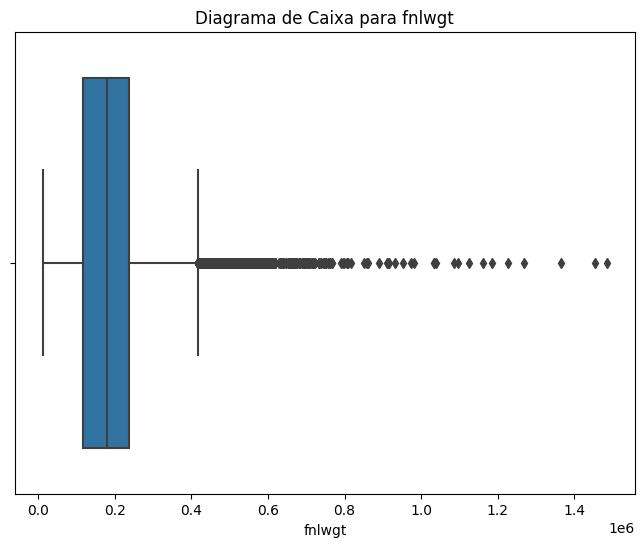

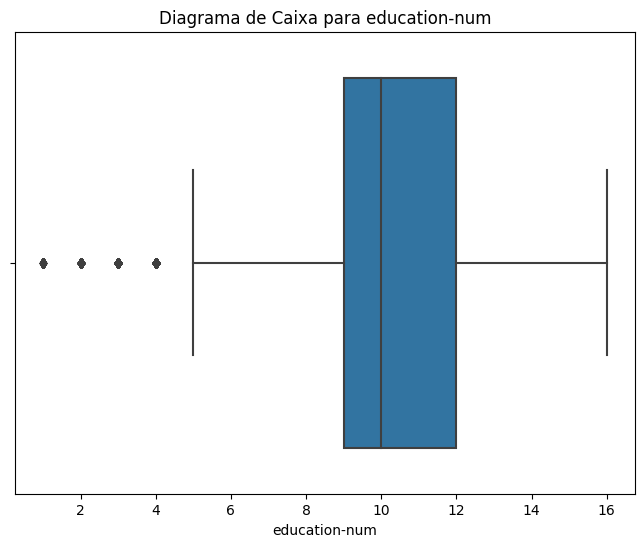

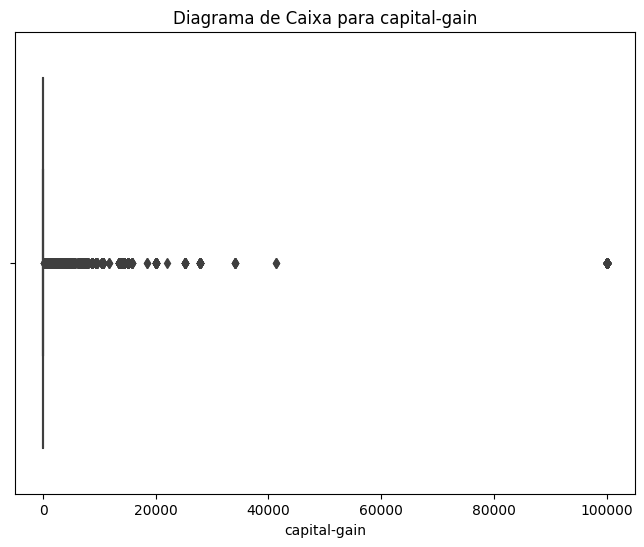

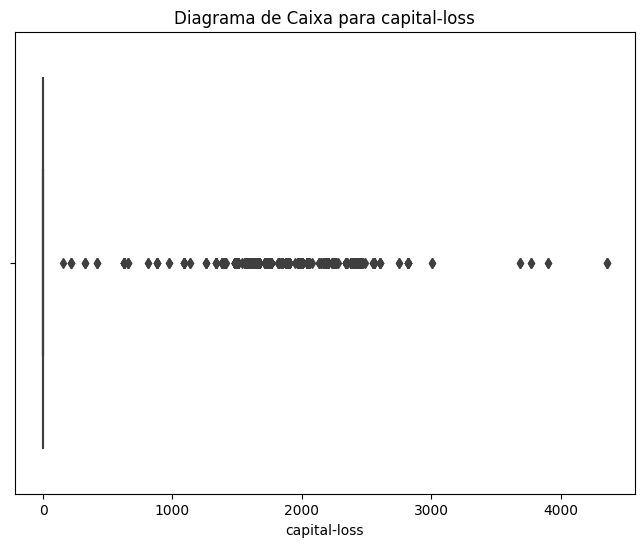

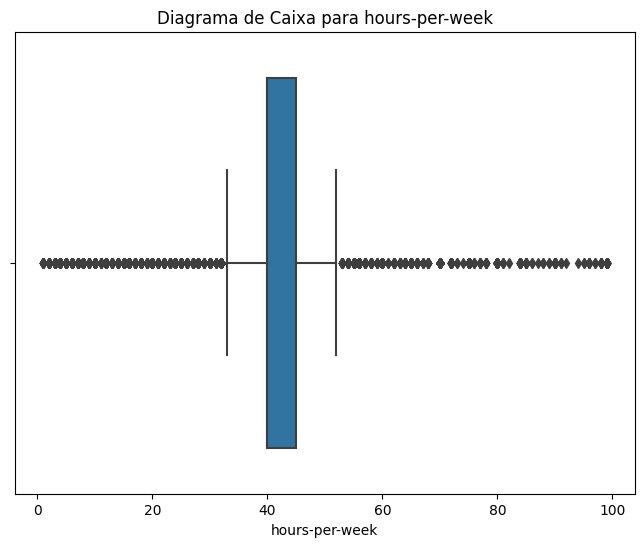

In [3]:
# Identificar o tipo de dados de cada coluna
data_types = df.dtypes
print("\nTipos de dados de cada coluna:\n", data_types)

# Gráficos de box plot para variáveis numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f'Diagrama de Caixa para {column}')
    plt.xlabel(column)
    plt.show()


In [4]:
# Identificar valores ausentes
missing_values = df.isnull().sum()

# Exibir as colunas com valores ausentes, se houver
columns_with_missing_values = missing_values[missing_values > 0].index

if len(columns_with_missing_values) > 0:
    print("Colunas com valores ausentes:")
    for column in columns_with_missing_values:
        print(f"{column}: {missing_values[column]} valores ausentes")
else:
    print("Não há valores ausentes no conjunto de dados.")


Não há valores ausentes no conjunto de dados.


<Figure size 1200x800 with 0 Axes>

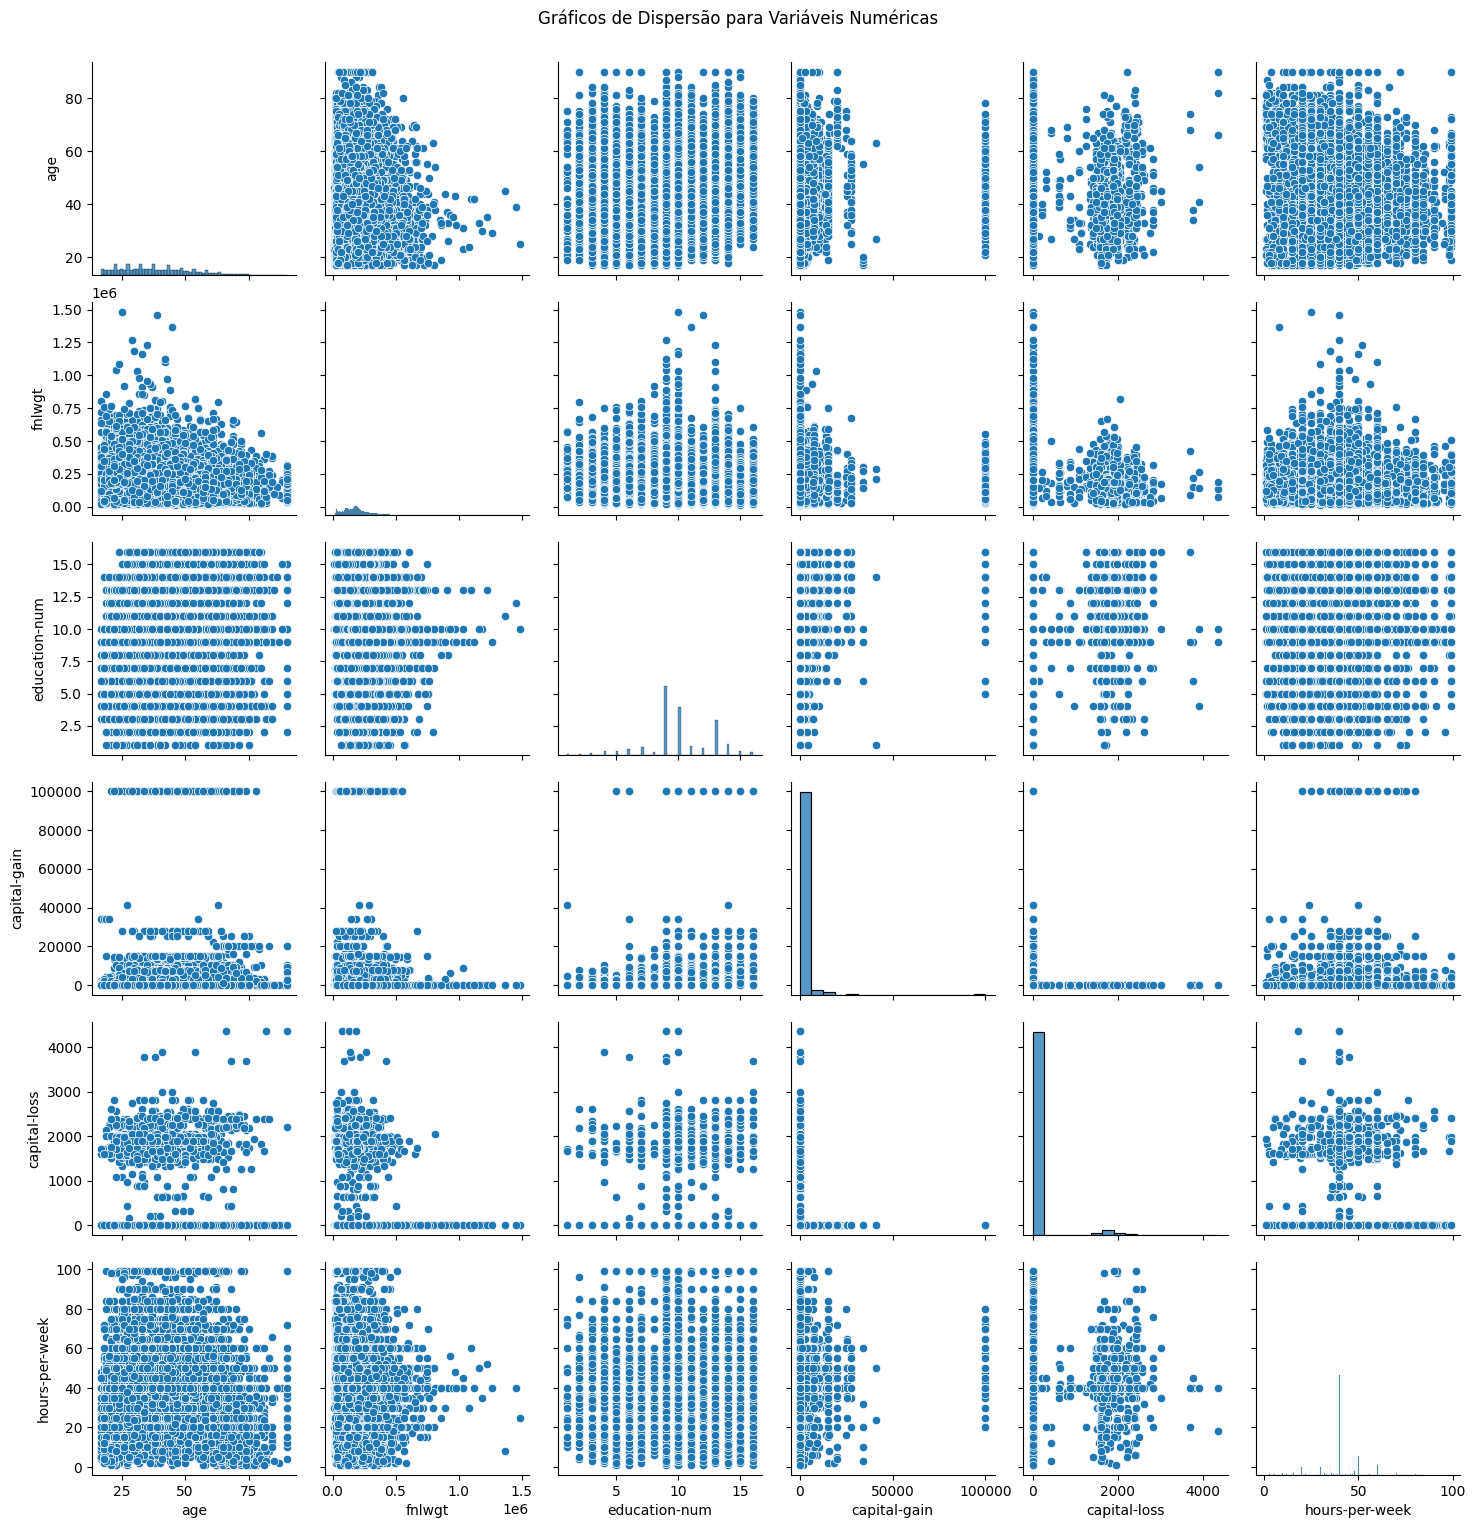

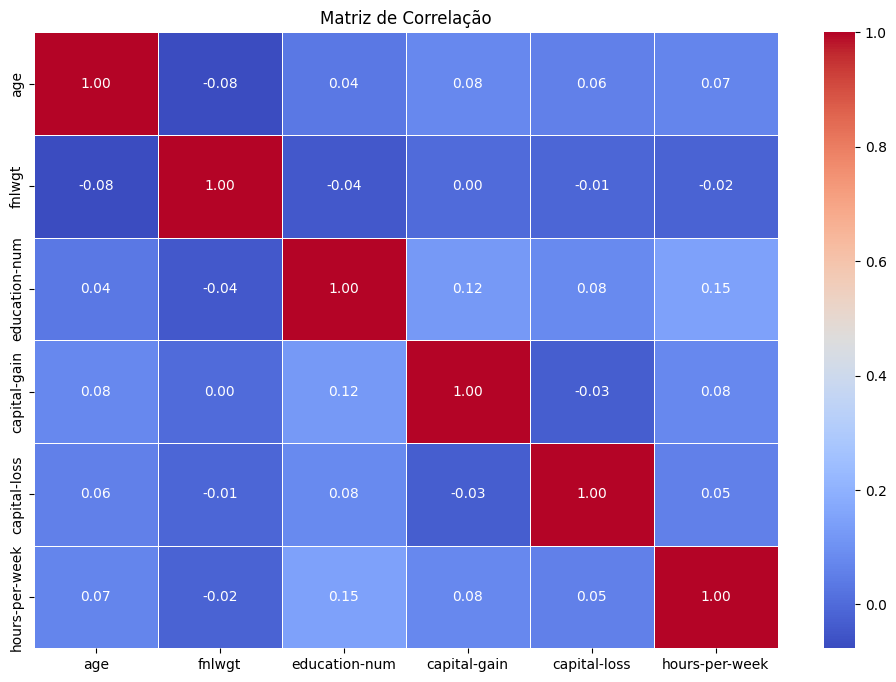

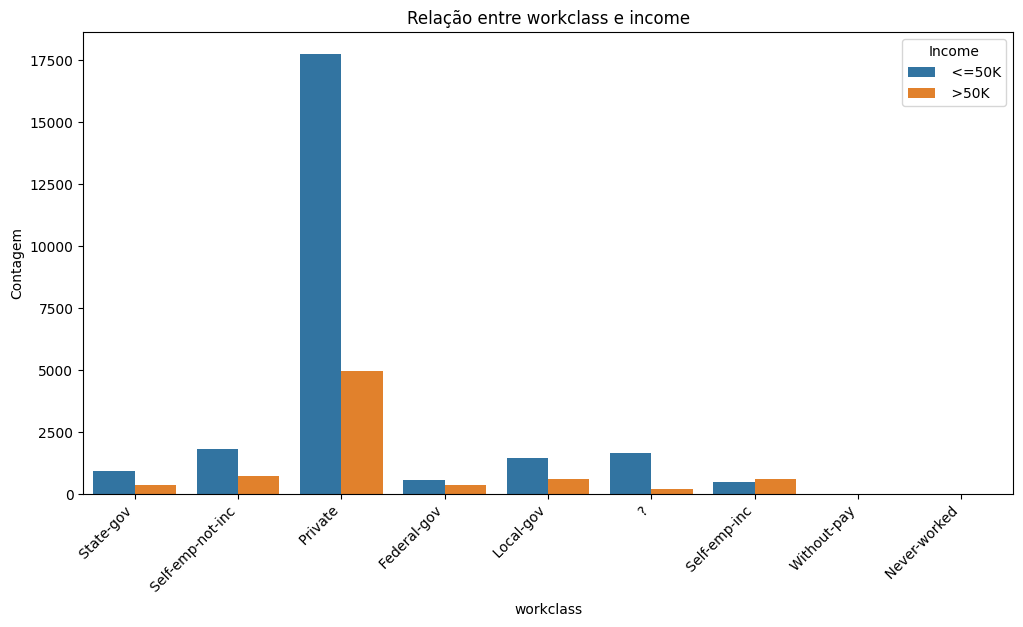

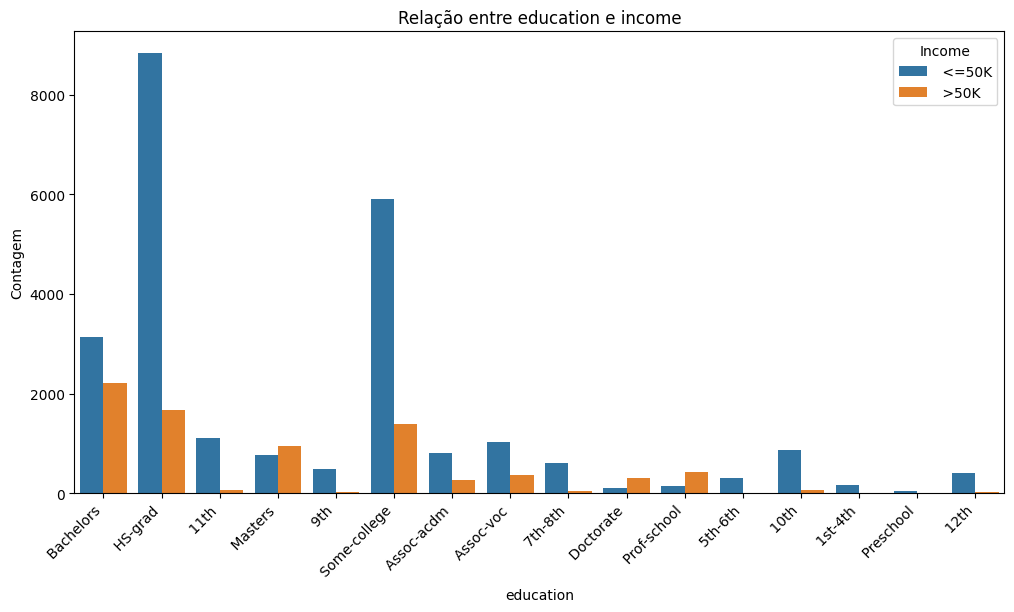

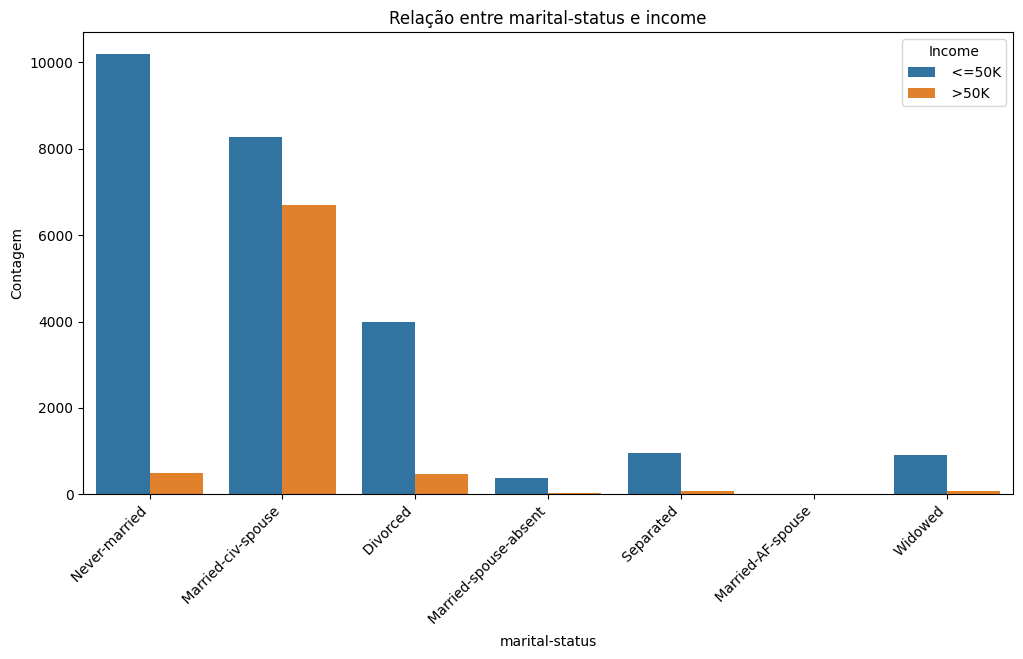

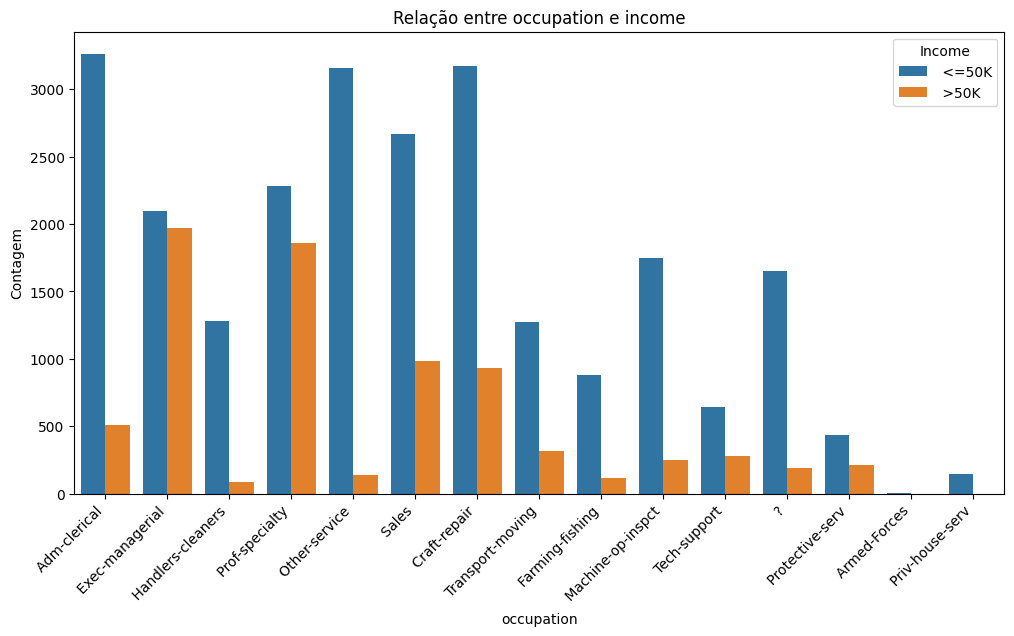

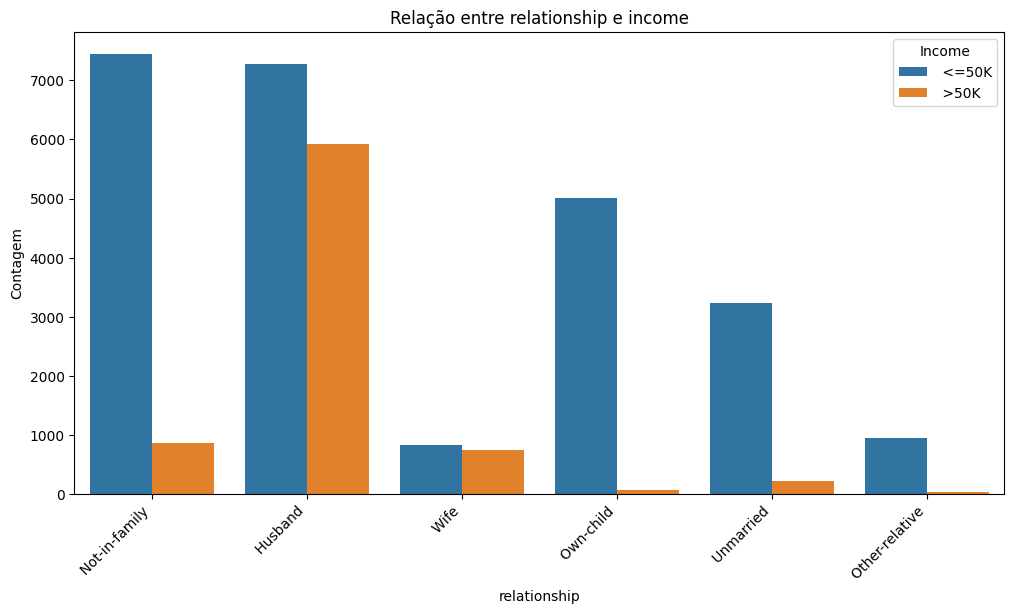

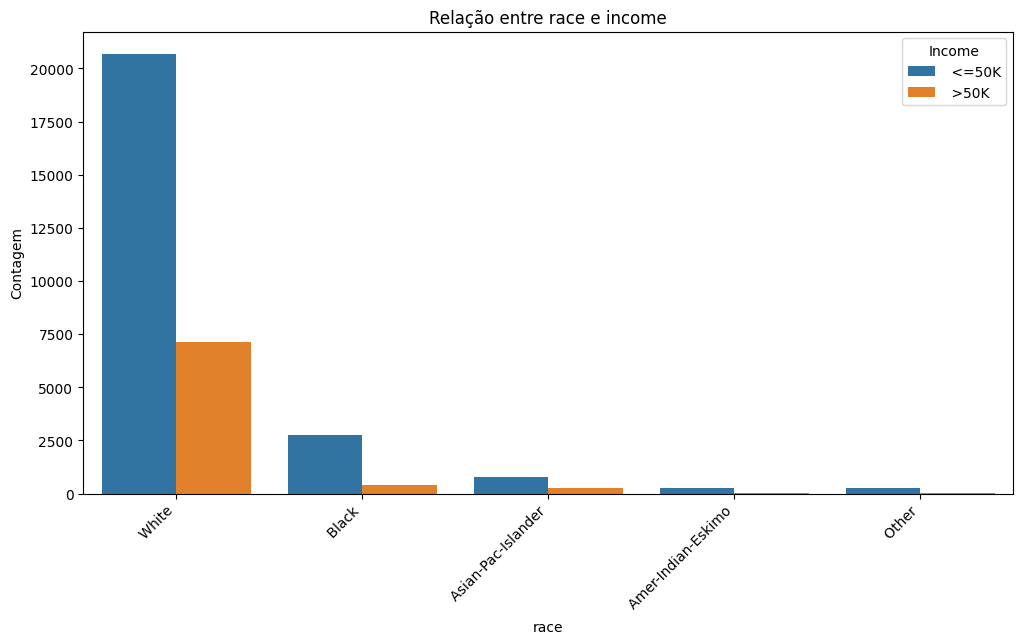

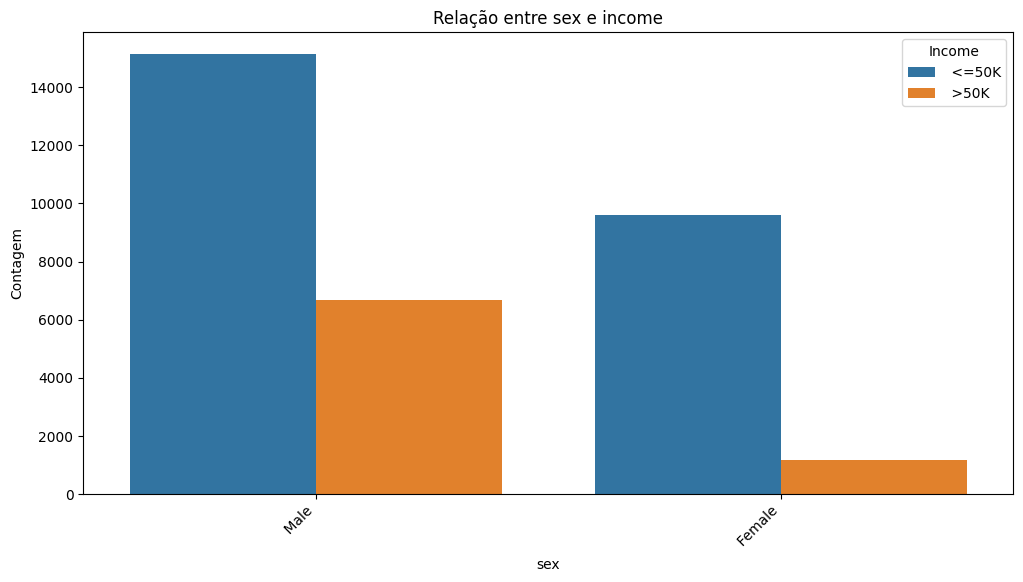

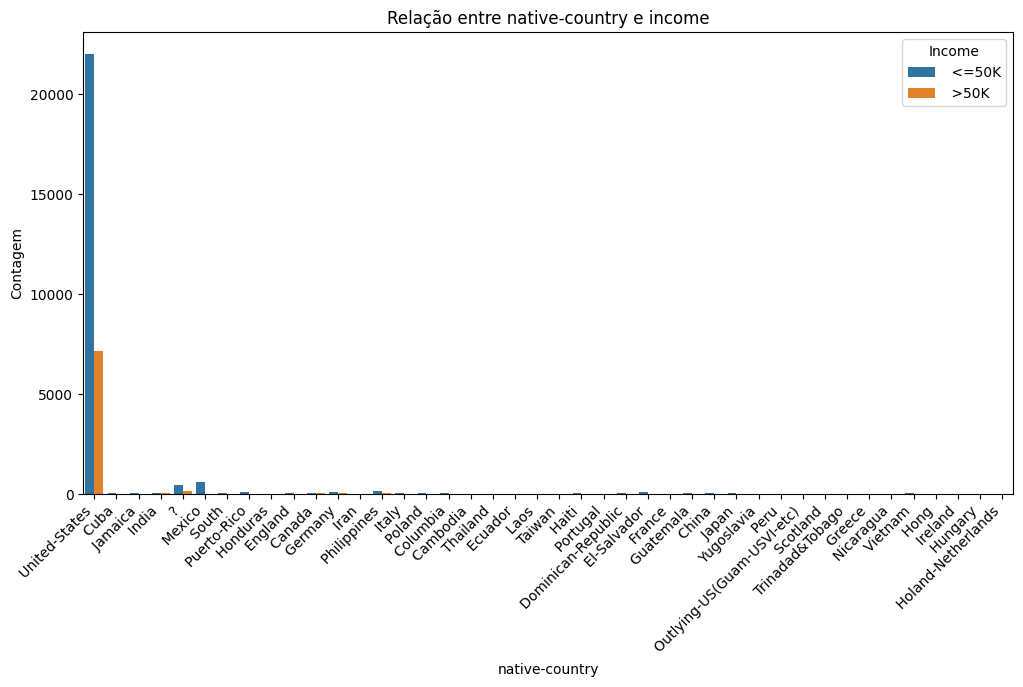

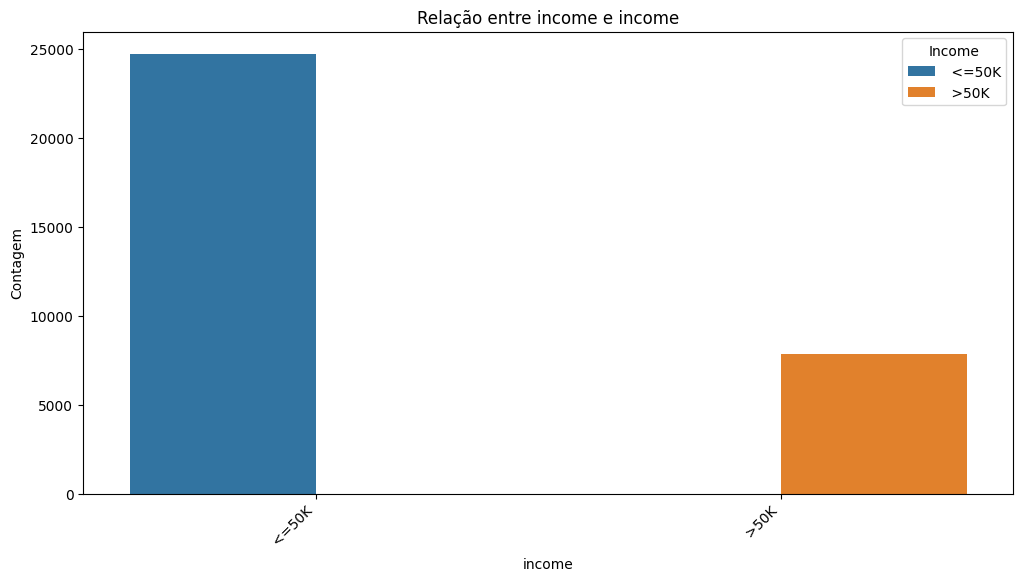

In [5]:
# Gráficos de dispersão para variáveis numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns])
plt.suptitle("Gráficos de Dispersão para Variáveis Numéricas", y=1.02)
plt.show()

# Matriz de correlação
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# Gráficos de contagem para variáveis categóricas em relação à variável alvo 'income'
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='income', data=df)
    plt.title(f'Relação entre {column} e income')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Income', loc='upper right')
    plt.show()
